In [1]:
import json, random, time
import numpy as np
from pprint import pprint
from collections import Counter, defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import copy
np.set_printoptions(precision=4)

In [2]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [3]:
txt_dataset = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/txt_dataset_0725.json", "r"))
img_dataset = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/img_dataset_0725.json", "r"))

In [4]:
img_meta = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data/img_metadata-Copy1.json", "r"))

In [5]:
### Comparison of length distribution of img captions: 
# with pos imgs || with neg imgs for img data || with neg imgs for txt data
cap_lengths = {'pos_imgs': [], 'neg_imgs_for_img': [], 'neg_imgs_for_txt': []}
for k in img_dataset:
    for gid in img_dataset[k]['GoldIds']:
        i = str(int(gid))
        cap_lengths['pos_imgs'].append(len(tokenizer.tokenize((img_meta[i]['name']+' '+img_meta[i]['description']).replace("_", " ").strip())))
    for gid in img_dataset[k]['DistractorIds']:
        i = str(int(gid))
        cap_lengths['neg_imgs_for_img'].append(len(tokenizer.tokenize((img_meta[i]['name']+' '+img_meta[i]['description']).replace("_", " ").strip())))
for k in txt_dataset:
    for i in txt_dataset[k]['img_negFacts']:
        cap_lengths['neg_imgs_for_txt'].append(len(tokenizer.tokenize(i['caption'].strip())))
        
for k in cap_lengths:
    print(k, len(cap_lengths[k]))

pos_imgs 36597
neg_imgs_for_img 752251
neg_imgs_for_txt 157029


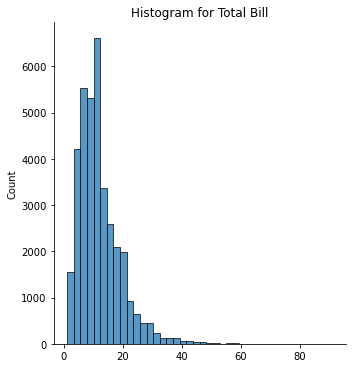

In [12]:
sns.displot(cap_lengths['pos_imgs'], kde = False, bins=40)
plt.title("Histogram for Total Bill")
plt.show()

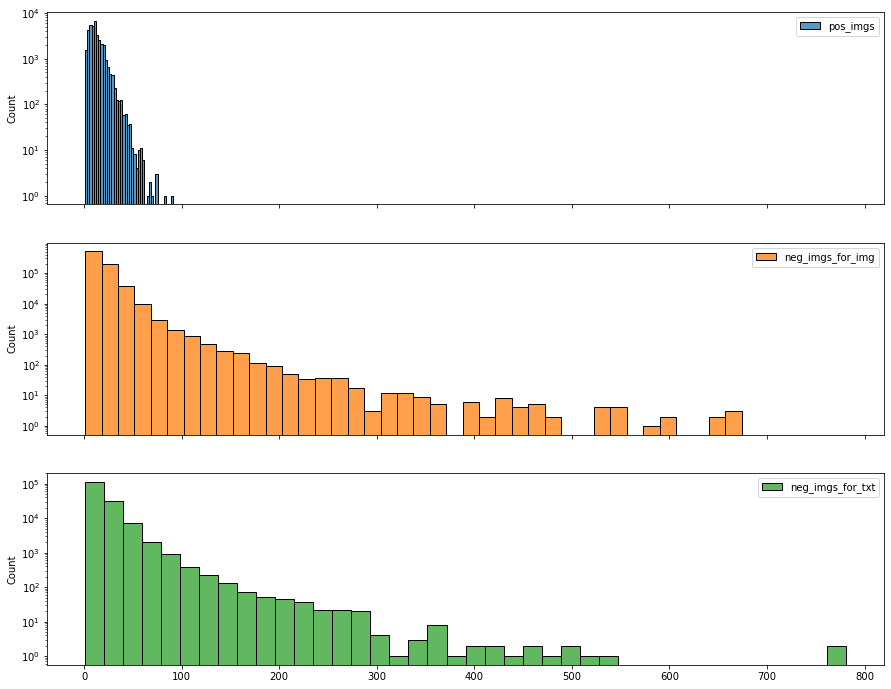

In [28]:
colors = sns.color_palette("tab10")
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15,12))
for i, k, color in zip(range(3), list(cap_lengths.keys()), colors[:3]):
    ax = axes[i]
    ax.set(yscale="log")
    sns.histplot(cap_lengths[k], ax=ax, kde=False, bins=40, label=k, color=color)
    ax.legend()

In [29]:
for k in cap_lengths:
    print(k, np.mean(cap_lengths[k]), np.std(cap_lengths[k]))

pos_imgs 11.808508894171654 7.150573026092369
neg_imgs_for_img 16.434307166092168 14.222141898446292
neg_imgs_for_txt 17.679059282043443 18.14455315282661


In [ ]:
### Comparison of length distribution of snippets: 
# with pos snippets || with neg snippets for img data || with neg snippets for txt data
snippet_lengths = {'pos_snippets': [], 'neg_snippets_for_img': [], 'neg_snippets_for_txt': []}
for k in txt_dataset:
    for f in txt_dataset[k]['SupportingFacts']:
        snippet_lengths['pos_snippets'].append(len(tokenizer.tokenize(f['fact'])))
    for gid in txt_dataset[k]['new_negFacts']:
        snippet_lengths['neg_snippets_for_txt'].append(len(tokenizer.tokenize(f['fact'])))
for k in img_dataset:
    for i in img_dataset[k]['DistractorFacts']:
        snippet_lengths['neg_snippets_for_img'].append(len(tokenizer.tokenize(f['fact'])))
        
for k in snippet_lengths:
    print(k, len(snippet_lengths[k]))

In [ ]:
for k in snippet_lengths:
    print(k, np.mean(snippet_lengths[k]), np.std(snippet_lengths[k]))

In [ ]:
colors = sns.color_palette("tab10")
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15,12))
for i, k, color in zip(range(3), list(cap_lengths.keys()), colors[:3]):
    ax = axes[i]
    ax.set(yscale="log")
    sns.histplot(cap_lengths[k], ax=ax, kde=False, bins=40, label=k, color=color)
    ax.legend()